In [1]:
data_home = "../data"
local_lib = "../lib"
data_prefix = 'austen-melville'

In [2]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns; sns.set()
import sys; sys.path.append(local_lib)
from hac2 import HAC

# Get Data

In [3]:
LIB = pd.read_csv("../data/output/austen-melville-LIB.csv").set_index('book_id')
BOW = pd.read_csv("../data/output/austen-melville-BOW_REDUCED.csv").set_index(['book_id','term_str'])

In [4]:
# author = 'AUS'
author = '.'

In [5]:
DOC = LIB.loc[LIB.author.str.match(author), ['author','title']].copy()

In [6]:
DOC['label'] = DOC.apply(lambda x: f"{x.name}–{x.author.split(',')[0]}–{x.title[:20]}", 1)

In [7]:
DOC

,author,title,label
book_id,,,
105,"AUSTEN, JANE",PERSUASION,105–AUSTEN–PERSUASION
121,"AUSTEN, JANE",NORTHANGER ABBEY,121–AUSTEN–NORTHANGER ABBEY
141,"AUSTEN, JANE",MANSFIELD PARK,141–AUSTEN–MANSFIELD PARK
158,"AUSTEN, JANE",EMMA,158–AUSTEN–EMMA
161,"AUSTEN, JANE",SENSE AND SENSIBILITY,161–AUSTEN–SENSE AND SENSIBILIT
946,"AUSTEN, JANE",LADY SUSAN,946–AUSTEN–LADY SUSAN
1212,"AUSTEN, JANE",LOVE AND FREINDSHIP SIC,1212–AUSTEN–LOVE AND FREINDSHIP
1342,"AUSTEN, JANE",PRIDE AND PREJUDICE,1342–AUSTEN–PRIDE AND PREJUDICE
1900,"MELVILLE, HERMAN",TYPEE A ROMANCE OF THE SOUTH SEAS,1900–MELVILLE–TYPEE A ROMANCE OF T


In [30]:
X = BOW.loc[DOC.index].tfidf_l2.unstack() + .00001

In [32]:
X

term_str,abandoned,abilities,able,abode,abroad,abruptly,absence,absent,absolute,absolutely,...,yield,yielded,yielding,yonder,young,younger,yours,yourselves,youth,youthful
book_id,,,,,,,,,,,,,,,,,,,,,
105,0.000010,0.017431,0.035046,0.004546,0.011287,0.000010,0.012230,0.007110,0.005152,0.010047,...,0.003728,0.003066,0.005287,0.000010,0.057307,0.021596,0.017733,0.004874,0.030528,0.003489
121,0.000010,0.013390,0.042018,0.004780,0.010811,0.004588,0.029482,0.018706,0.008108,0.006496,...,0.000010,0.018152,0.000010,0.000010,0.081430,0.017344,0.022455,0.002459,0.007964,0.004487
141,0.000010,0.008269,0.043178,0.010808,0.005469,0.000010,0.033035,0.026453,0.010787,0.025989,...,0.006307,0.002713,0.004454,0.000010,0.052450,0.016557,0.016831,0.004571,0.005352,0.000010
158,0.000010,0.004228,0.051558,0.001480,0.006587,0.005839,0.018471,0.011628,0.007029,0.031400,...,0.005972,0.003319,0.001596,0.000010,0.064611,0.002935,0.005039,0.000010,0.012754,0.002547
161,0.002091,0.020250,0.035086,0.010229,0.014202,0.006134,0.014215,0.005425,0.006928,0.011022,...,0.002825,0.001527,0.000010,0.000010,0.047938,0.012489,0.014350,0.008473,0.007165,0.005139
946,0.000010,0.052266,0.046126,0.000010,0.000010,0.000010,0.016056,0.000010,0.036970,0.036819,...,0.012569,0.000010,0.005614,0.000010,0.042307,0.006019,0.115855,0.000010,0.007567,0.010309
1212,0.005328,0.000940,0.027371,0.000010,0.000010,0.001840,0.011803,0.011448,0.000010,0.000610,...,0.000010,0.000010,0.000010,0.000010,0.036199,0.009576,0.045945,0.010169,0.054307,0.000010
1342,0.000010,0.010163,0.040992,0.017063,0.004341,0.004054,0.032182,0.003600,0.004096,0.019494,...,0.005634,0.002909,0.005819,0.000010,0.058528,0.046178,0.025104,0.002567,0.008886,0.000010
1900,0.019239,0.000010,0.013740,0.013191,0.001385,0.007504,0.009641,0.008555,0.001406,0.006244,...,0.004432,0.008873,0.015333,0.001861,0.038750,0.000563,0.000010,0.002066,0.002495,0.005069


# HAC

## Docs

In [35]:
dend = HAC(X)
dend.labels = DOC.label.to_list()
dend.h = len(X)

<Figure size 432x288 with 0 Axes>

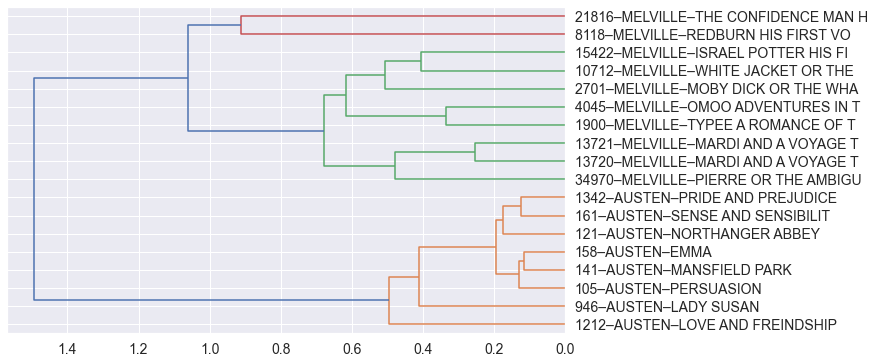

In [36]:
dend.plot()

## Terms

In [41]:
V = [col for col in X.columns.to_list() if len(col) > 5]
dend2 = HAC(X[V].T.sample(50))
dend2.h = 50
dend.norm = 'l2'
dend2.dist_metric = 'jensenshannon'
dend2.linkage_method = 'ward'

<Figure size 432x288 with 0 Axes>

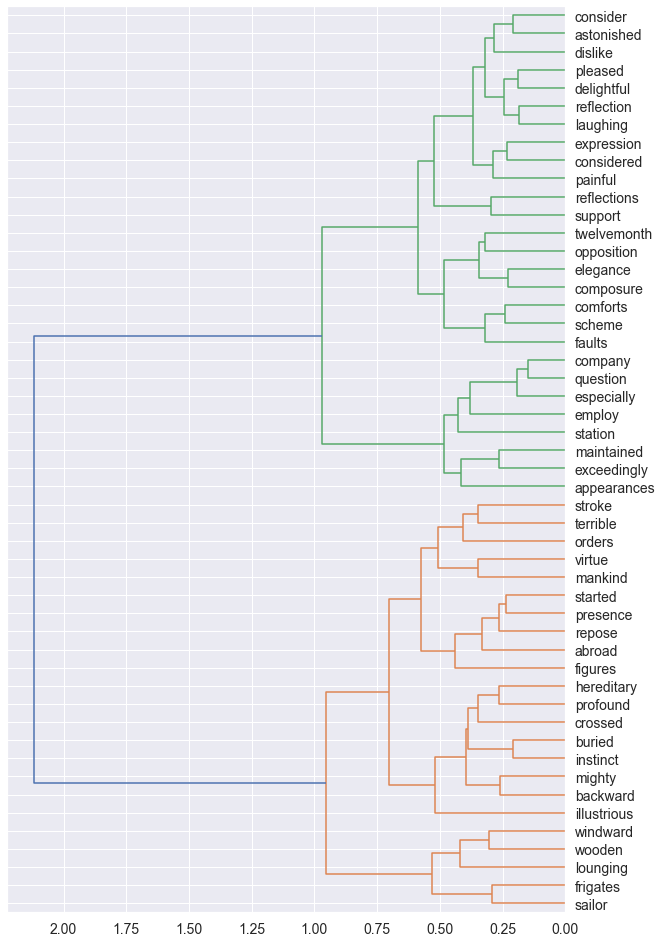

In [42]:
dend2.plot()

# SKLearn

In [71]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

## Documents

In [75]:
doc_clustering = AgglomerativeClustering(n_clusters=4).fit(X)

In [76]:
DOC['class'] = doc_clustering.labels_

In [77]:
DOC.style.background_gradient()

,author,title,label,y_hat,class
book_id,,,,,
105,"AUSTEN, JANE",PERSUASION,105–AUSTEN–PERSUASION,1,1
121,"AUSTEN, JANE",NORTHANGER ABBEY,121–AUSTEN–NORTHANGER ABBEY,1,1
141,"AUSTEN, JANE",MANSFIELD PARK,141–AUSTEN–MANSFIELD PARK,1,1
158,"AUSTEN, JANE",EMMA,158–AUSTEN–EMMA,1,1
161,"AUSTEN, JANE",SENSE AND SENSIBILITY,161–AUSTEN–SENSE AND SENSIBILIT,1,1
946,"AUSTEN, JANE",LADY SUSAN,946–AUSTEN–LADY SUSAN,1,1
1212,"AUSTEN, JANE",LOVE AND FREINDSHIP SIC,1212–AUSTEN–LOVE AND FREINDSHIP,1,1
1342,"AUSTEN, JANE",PRIDE AND PREJUDICE,1342–AUSTEN–PRIDE AND PREJUDICE,1,1
1900,"MELVILLE, HERMAN",TYPEE A ROMANCE OF THE SOUTH SEAS,1900–MELVILLE–TYPEE A ROMANCE OF T,0,0


## Vocab to Topics

In [137]:
n_clusters = 10
term_clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X.T)
V = pd.DataFrame(dict(term_clust=term_clustering.labels_), index=X.columns)

In [138]:
C = V.term_clust.value_counts().to_frame('n')
C.index.name = 'clust_id'
C['sample_words'] = ''

In [139]:
for i in range(n_clusters):
    try:
        print(i, V[V.term_clust == i].sample(10).index.to_list())
        C.loc[i, 'sample_words'] = ' '.join(V[V.term_clust == i].sample(10).index.to_list())
    except ValueError:
        pass
#         C.loc[i, 'top_words'] = ['']

0 ['act', 'fortune', 'age', 'seem', 'charity', 'gold', 'lips', 'deaf', 'entitled', 'call']
1 ['parted', 'importance', 'talking', 'spoken', 'beauty', 'fond', 'fancy', 'wait', 'gave', 'glad']
2 ['know', 'did', 'house', 'is', 'happiness', 'feelings', 'too', 'make', 'sister', 'visit']
3 ['sight', 'sad', 'prospect', 'right', 'hearts', 'thus', 'approaching', 'striking', 'lord', 'beard']
4 ['fore', 'seaman', 'neck', 'embrace', 'lift', 'knees', 'tall', 'shot', 'scuttle', 'vainly']
5 ['miserable', 'sailors', 'dream', 'bred', 'consideration', 'books', 'forlorn', 'ocean', 'town', 'becomes']
6 ['animation', 'forming', 'superiority', 'sees', 'opinions', 'strain', 'wore', 'eagerness', 'lane', 'certainty']
8 ['jacket', 'craft', 'officers', 'wars', 'white', 'war', 'man', 'ship', 'old', 'men']


In [140]:
C

,n,sample_words
clust_id,,
4,1394,height touched advance inches hovering joint m...
6,1234,flattered drawn principal travelling prudence ...
1,558,likely partner delightful rest dine news belie...
3,344,savage thoughts quiet live cocoa inmates face ...
0,86,press call page gentleman points business sick...
2,62,little daughter house quite father well letter...
8,30,sailor man deck ships wars sea main sail jacke...
5,16,town miserable becomes experiences books sailo...
7,3,


**Previous Example**
```
0 ['cap', 'powerful', 'pass', 'fortune', 'page', 'opening', 'hard', 'impatience', 'become', 'appear']
1 ['sense', 'else', 'found', 'judgment', 'going', 'considered', 'here', 'walked', 'longer', 'satisfaction']
2 ['make', 'sisters', 'enough', 'pleasure', 'sure', 'soon', 'young', 'own', 'only', 'much']
3 ['heavy', 'ah', 'presented', 'light', 'latter', 'struck', 'right', 'last', 'whole', 'sought']
4 ['thick', 'phantom', 'strangers', 'selected', 'theres', 'quarter', 'afternoon', 'chase', 'faint', 'line']
5 ['town', 'miserable', 'book', 'becomes', 'sailors', 'consideration', 'experiences', 'reader', 'ocean', 'mind']
6 ['secured', 'alas', 'politeness', 'middle', 'seriously', 'sacrifice', 'serve', 'sink', 'offering', 'relieve']
8 ['boat', 'officer', 'sailor', 'ship', 'deck', 'ye', 'board', 'top', 'craft', 'fish']
```

# Pdist

In [25]:
from scipy.spatial.distance import pdist

In [26]:
# BOW

In [27]:
pdist(BOW.tfidf_l2.unstack())

array([0.59872494, 0.49944308, 0.50639438, 0.58086977, 0.86562367,
       0.91873694, 0.56275341, 1.06685469, 1.15541088, 1.0297725 ,
       1.30376746, 1.12154312, 1.09892792, 1.16135363, 1.01774249,
       1.24905234, 1.04863401, 0.56119841, 0.57322767, 0.58670249,
       0.82126888, 0.89097091, 0.55915515, 1.06462571, 1.1471727 ,
       1.04615161, 1.30055917, 1.13032571, 1.09709322, 1.15258728,
       1.00504644, 1.24474768, 1.02078729, 0.48224471, 0.56388438,
       0.80484834, 0.9046425 , 0.50263778, 1.07847585, 1.15908205,
       1.04836936, 1.31020631, 1.14334257, 1.11506036, 1.1676524 ,
       1.03246361, 1.26695478, 1.05009387, 0.57714921, 0.80636385,
       0.88796544, 0.541308  , 1.08918247, 1.15480484, 1.06296997,
       1.31324965, 1.14207192, 1.1147904 , 1.16148666, 1.03460325,
       1.25153028, 1.05836724, 0.79151608, 0.8493877 , 0.49888988,
       1.0740933 , 1.17522712, 1.07441134, 1.30804591, 1.15802455,
       1.12280203, 1.16989991, 1.04864264, 1.26360582, 1.04500